In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
pf = pd.read_csv('../Documents/RegresionLineal.csv')

In [33]:
pf.head(3)

,metro,precio
0,5,375
1,15,487
2,20,450


In [30]:
# Hay Valores Nulos?
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   metro   4 non-null      int64
 1   precio  4 non-null      int64
dtypes: int64(2)
memory usage: 196.0 bytes


In [31]:
# Como se distribuyen las variables Numericas
pf.describe()

,metro,precio
count,4.000000,4.000000
mean,16.250000,453.000000
std,8.539126,56.148612
min,5.000000,375.000000
25%,12.500000,431.250000
50%,17.500000,468.500000
75%,21.250000,490.250000
max,25.000000,500.000000


In [32]:
pf.columns

Index(['metro', 'precio'], dtype='object')

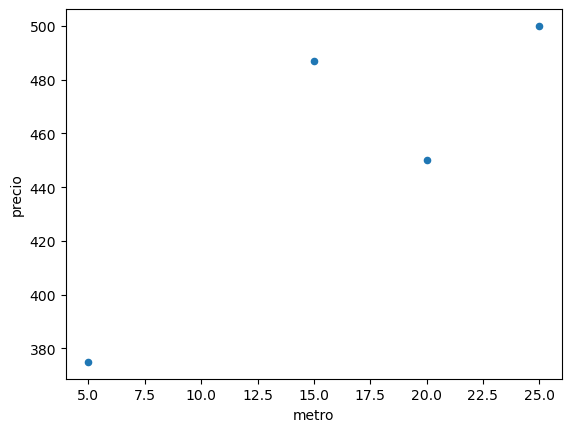

In [35]:
pf.plot.scatter(x='metro',y='precio')
plt.show()

In [58]:
#Parametos de la recta
w = 500
b = 5

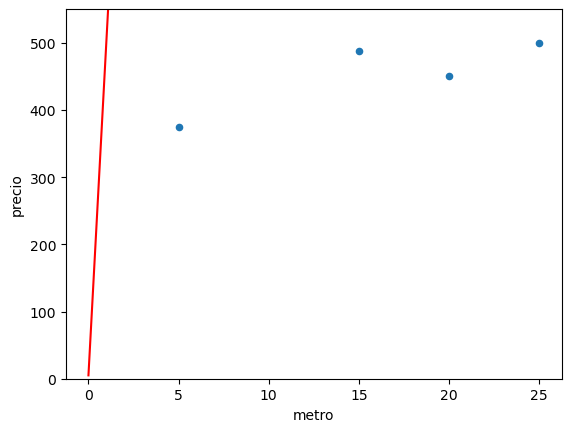

In [59]:
#Puntos de la recta 
x = np.linspace(0,pf['metro'].max(),100)
y = w*x+b

#grafica de la recta
pf.plot.scatter(x='metro',y='precio')
plt.plot(x, y, '-r')
plt.ylim(0,pf['precio'].max()*1.1)
# plt.grid()
plt.show()

In [62]:
pf['pred'] = pf['metro']*w+b

In [64]:
# calculo de la funcion de error
pf['diff'] = pf['pred']-pf['precio']
pf['cuad'] = pf['diff']**2
pf.head()

,metro,precio,pred,diff,cuad
0,5,375,2505,2130,4536900
1,15,487,7505,7018,49252324
2,20,450,10005,9555,91298025
3,25,500,12505,12005,144120025


In [65]:
# grid de la funcion de error basado en m, b=0
w = np.linspace(50,200,50)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [71]:
def sum_error(w, pf):
    b=0
    pf['pred'] = pf['metro']*w+b
    pf['diff'] = pf['pred']-pf['precio']
    pf['cuad'] = pf['diff']**2
    return(pf['cuad'].mean())

In [72]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, pf=pf))
grid_error.head()

,w,error
0,50.000000,237448.500000
1,53.061224,291052.883590
2,56.122449,350631.340483
3,59.183673,416183.870679
4,62.244898,487710.474177


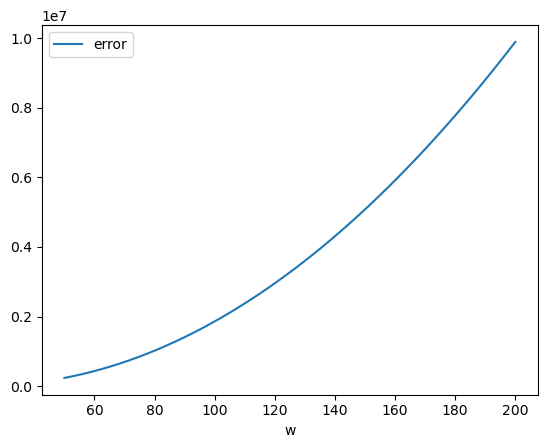

In [73]:
grid_error.plot(x='w',y='error')
plt.show()